In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5)
import funcs

import importlib
# importlib.reload(funcs)

from matplotlib import rc
rc('font', size=12)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)

# Some plots: compare dataset with and without jumps

In [2]:
datasets = [
    [
        # datasets in condition 1
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_48h_un-pol\20211110_48h_SL_pos1',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_48h_un-pol\20211110_48h_SL_pos2',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_48h_un-pol\20211110_48h_SL_pos3',
    ],
    [
        # dataset in condition 2
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211111_SL_72h_pos1',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211117_SL_72h_pos2',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211117_SL_72h_pos3',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211125_SL_72h_pos1',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211125_SL_72h_pos2',
    ],
    [
        # datasets in condition 3
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\1i_72h\20210325_1i_72h_pos3',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\1i_72h\20210325_1i_72h_pos4',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\1i_72h\20210429_1i_72h_pos3',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\1i_72h\20210429_1i_72h_pos4',
    ],
    [   
        # datasets in condition 4
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\2i_96h\20220211_2i_96h_pos2',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\2i_96h\20220211_2i_96h_pos3',
        r'Y:\Kerim_Anlas\for_jordi\all_tracking_data\2i_96h\20220211_2i_96h_pos4',
    ],
]

T_thr = [
    [
        [ 131, 197 ],
        [ 130, 197 ],
        [ 132, 196 ],
    ],
    [
        [ 123, 193 ],
        [ 131, 211 ],
        [ 128, 197 ],
        [ 165, 248 ],
        [ 136, 212 ],
    ],
    [
        [ 152, 222 ],
        [ 136, 212 ],
        [ 128, 199 ],
        [ 132, 206 ],
    ],
    [
        [ 135, 203 ],
        [ 132, 194 ],
        [ 132, 198 ],
    ],
]

In [3]:
df_cells = [[None for j in i] for i in datasets]
df_tracks = [[None for j in i] for i in datasets]

for i, dd in enumerate( datasets ):
    for j, d in enumerate( dd ):
        print(i, d)
        df_cells_one = pd.read_csv(os.path.join(d, 'cells_no_div_no_jumps.csv'), index_col=0)
        df_tracks_one = pd.read_csv(os.path.join(d,'tracks_no_div_no_jumps.csv'), index_col=0)
        
        df_cells_one['condition'] = i
        df_tracks_one['condition'] = i
        
        df_cells_one['dataset'] = d
        df_tracks_one['dataset'] = d

        df_cells_one['dataset_idx'] = j
        df_tracks_one['dataset_idx'] = j

        df_cells_one['unique_id'] = [ str(i) + '_' + str(j) + '_' + str(c_id) for c_id in df_cells_one.cell_id.values ]
        df_tracks_one['unique_id'] = [ str(i) + '_' + str(j) + '_' + str(c_id) for c_id in df_tracks_one.cell_id.values ]
        
        df_cells[i][j] = df_cells_one
        df_tracks[i][j] = df_tracks_one


0 Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_48h_un-pol\20211110_48h_SL_pos1
0 Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_48h_un-pol\20211110_48h_SL_pos2
0 Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_48h_un-pol\20211110_48h_SL_pos3
1 Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211111_SL_72h_pos1
1 Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211117_SL_72h_pos2
1 Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211117_SL_72h_pos3
1 Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211125_SL_72h_pos1
1 Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_72h\20211125_SL_72h_pos2
2 Y:\Kerim_Anlas\for_jordi\all_tracking_data\1i_72h\20210325_1i_72h_pos3
2 Y:\Kerim_Anlas\for_jordi\all_tracking_data\1i_72h\20210325_1i_72h_pos4
2 Y:\Kerim_Anlas\for_jordi\all_tracking_data\1i_72h\20210429_1i_72h_pos3
2 Y:\Kerim_Anlas\for_jordi\all_tracking_data\1i_72h\20210429_1i_72h_pos4
3 Y:\Kerim_Anlas\for_jordi\all_tracking_data\2i_96h\20220211_2i_96h_pos2
3 Y:\Kerim_Anlas\for_jordi\all

In [4]:
df_tracks[0][0]

,cell_id,len,start_t,end_t,speed,ch1,ch2,end2end,cumdist,condition,dataset,dataset_idx,unique_id
0,0,40,0,39,2.758579,134.176790,185.177412,13.932249,107.584581,0,Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_...,0,0_0_0
1,1,12,0,11,2.852679,134.422207,145.115355,3.448261,31.379473,0,Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_...,0,0_0_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,3060,9,61,69,2.965044,134.236064,72.824660,7.901724,23.720351,0,Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_...,0,0_0_3060
3061,3061,15,61,75,4.121656,164.354110,609.826913,12.506080,57.703181,0,Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_...,0,0_0_3061


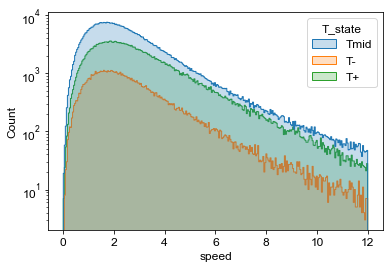

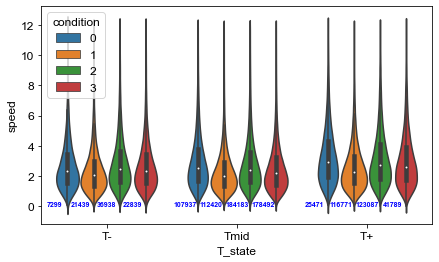

In [5]:
import seaborn as sns

for i in range( len( df_cells ) ):
    for j in range( len( df_cells[i] ) ):
        d = df_cells[i][j]
        thr = T_thr[i][j]
        
        d['T_state'] = ''
        d.loc[d['mean-ch1'].values>=thr[1], 'T_state'] = 'T+'
        d.loc[(d['mean-ch1'].values>=thr[0])&(d['mean-ch1'].values<thr[1]), 'T_state'] = 'Tmid'
        d.loc[d['mean-ch1'].values<thr[0], 'T_state'] = 'T-'
        
        df_cells[i][j] = d

flat_df = funcs.flatten_list( df_cells )
flat_df = pd.concat( flat_df, ignore_index=True )

plt.figure()
sns.histplot(flat_df, x="speed", hue="T_state", element="step", log_scale=(False,True), stat='count')

#plt.figure()
#sns.violinplot(data=flat_df, x="T_state", y="speed")

x_order = ['T-','Tmid','T+']

figure2, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,4))
sns.violinplot(data=flat_df, x="T_state", y="speed", hue="condition", ci='sd', order=x_order)

#medians = flat_df.groupby(['T_state'])['speed'].median().values
# nobs = flat_df['T_state'].value_counts().values
# nobs = [str(x) for x in nobs.tolist()]
# nobs = ["n: " + i for i in nobs]
nobs = flat_df.groupby(["condition", "T_state"]).size().reset_index()
nobs = nobs.rename(columns={0: "counts"})

pos = range(len(nobs))
for x in x_order:#tick, label in zip(pos, ax.get_xticklabels()):
    pos = x_order.index(x)
    conditions = nobs[nobs.T_state==x].condition.values
    conditions.sort()
    step=0.2
    i = 0
    for c in conditions:
#         print(c)
        ax.text(pos+(i-len(conditions)//2)*step, 0., str(nobs[(nobs.T_state==x)&(nobs.condition==c)].counts.values[0]),
            horizontalalignment='center',
            size=7,
            color='b',
            weight='bold')
        i+=1
plt.show()


# figure2.savefig('Tpos_vsTneg_allTPs.pdf')

#plt.figure()
#sns.barplot(data=df_cells, x="T_state", y="speed", errorbar='sd')

In [6]:
pos+(i-conditions//2)*step

array([2.8, 2.8, 2.6, 2.6])

## Plot for last timepoint

In [7]:
# select only cells in last tp
df_tracks_lasttp = [[None for j in i] for i in datasets]

for i in range( len( df_cells ) ):
    for j in range( len( df_cells[i] ) ):
        # select cells and track of the experiment
        dc = df_cells[i][j]
        dt = df_tracks[i][j]
        
        # select cells in last timepoint
        dc_lasttp = dc[dc.t==np.max(dc.t)]
        
        # obtain cell_id index and their relative T_state
        cell_ids = dc_lasttp.cell_id.values
        T_state = dc_lasttp['T_state'].values
#         condition = dc_lasttp['condition'].values
#         dataset_idx = dc_lasttp['dataset_idx'].values
#         unique_id = dc_lasttp['unique_id'].values

        # extract tracks of cells in last tp and append their info
        dt_lasttp = dt.loc[[cid in cell_ids for cid in dt.cell_id]].copy()
        dt_lasttp.loc[:, 'T_state'] = T_state
#         dt_lasttp.loc[:, 'condition'] = condition
#         dt_lasttp.loc[:, 'dataset_idx'] = dataset_idx
#         dt_lasttp.loc[:, 'unique_id'] = unique_id
        
        # select tracks longer than 10 tps
        dt_lasttp = dt_lasttp[dt_lasttp.len>10]
        
        # save dataframe
        df_tracks_lasttp[i][j] = dt_lasttp

flat_df = funcs.flatten_list( df_tracks_lasttp )
flat_df = pd.concat( flat_df, ignore_index=True )
        

In [8]:
flat_df

,cell_id,len,start_t,end_t,speed,ch1,ch2,end2end,cumdist,condition,dataset,dataset_idx,unique_id,T_state
0,235,51,149,199,2.838159,164.247392,119.379668,25.347203,141.907934,0,Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_...,0,0_0_235,Tmid
1,256,80,120,199,3.416035,184.972176,517.087329,30.610394,269.866742,0,Y:\Kerim_Anlas\for_jordi\all_tracking_data\SL_...,0,0_0_256,Tmid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,2726,92,83,174,1.994556,137.140905,164.372527,16.338995,181.504560,3,Y:\Kerim_Anlas\for_jordi\all_tracking_data\2i_...,2,3_2_2726,Tmid
2776,2744,91,84,174,2.160641,150.686303,134.070404,30.799328,194.457709,3,Y:\Kerim_Anlas\for_jordi\all_tracking_data\2i_...,2,3_2_2744,Tmid


In [9]:
set(flat_df['T_state'])

{'T+', 'T-', 'Tmid'}

<AxesSubplot:xlabel='T_state', ylabel='speed'>

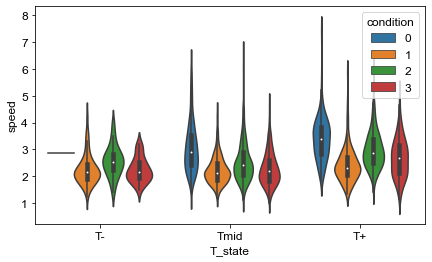

In [10]:
#200
x_order = ['T-','Tmid','T+']
#x_order = ['T-','T+'] do this to remove tpos or tneg


#plt.figure()
#sns.barplot(
##    data=flat_df, x='T_state', y='speed', 
#    hue='condition', 
#    ci='sd', 
#    order=x_order,
#)

figure1, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,4))

#plt.figure()
sns.violinplot(
    data=flat_df, x='T_state', y='speed', 
    hue='condition', 
    ci='sd', 
    order=x_order,
)

#figure1.savefig('Tpos_vsTneg_lastTPs.pdf')

#sns.violinplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)

# Velocity plot at all timepoints, per track not per cell

In [13]:
# T_thr = [130, 160]
track_length_thr = 7

df_tracks_all_tps = [[None for j in i] for i in datasets]

for i in range( len( df_cells ) ):
    for j in range( len( df_cells[i] ) ):
        # select cells and track of the experiment
        dc = df_cells[i][j]
        
        condition = dc.condition.values[0]
        dataset = dc_lasttp['dataset'].values[0]
        dataset_idx = dc_lasttp['dataset_idx'].values[0]
        thr = T_thr[i][j]      
        
        df_tracks_tps = pd.DataFrame({})

        # filter cells around that tp
        df_tp_original = dc.copy()
        track_ids_original = list(set(df_tp_original.cell_id.values))

        # remove short tracks
        df_tp = pd.DataFrame({})
        for track_id in track_ids_original:
            df_cell = df_tp_original[df_tp_original.cell_id==track_id]
            if len(df_cell)>track_length_thr:
                df_tp = pd.concat([df_tp,df_cell])
        df_tp = df_tp.reset_index(drop=True)

        # find out ids of remaining cells
        track_ids = list(set(df_tp.cell_id.values))

        # compute T positive/negative and mid cells
        T_vals = np.array([np.mean(df_tp[df_tp.cell_id==track_id]['mean-ch1'].values) for track_id in track_ids])
        track_Tpos = []
        for T_val in T_vals:
            if T_val<thr[0]:
                track_Tpos.append('T-')
            if (T_val>=thr[0])&(T_val<thr[1]):
                track_Tpos.append('Tmid')
            if T_val>=thr[1]:
                track_Tpos.append('T+')

        # compute mean velocity
        mean_vel = []
        for track_id in track_ids:
            pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
            mean_vel.append(np.mean(np.linalg.norm(np.diff(pos,axis=0),axis=1)))

        # compute cumdist
        cum_dist = []
        for track_id in track_ids:
            pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
            cum_dist.append(np.sum(np.linalg.norm(np.diff(pos,axis=0),axis=1))/pos.shape[0])

        # compute endo2end
        end2end = []
        for track_id in track_ids:
            pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
            end2end.append(np.linalg.norm(pos[0]-pos[-1])/pos.shape[0])

        df_tracks_tp = pd.DataFrame({
            'condition': condition,
            'dataset': dataset,
            'dataset_idx': dataset_idx,
            'cell_id': track_ids,
            'T_state': track_Tpos,
            'speed': mean_vel,
            'cumdist': cum_dist,
            'end2end': end2end,
        })

        df_tracks_tps = pd.concat([df_tracks_tps, df_tracks_tp])

        df_tracks_all_tps[i][j] = df_tracks_tps

flat_df = funcs.flatten_list( df_tracks_all_tps )
flat_df = pd.concat( flat_df, ignore_index=True )


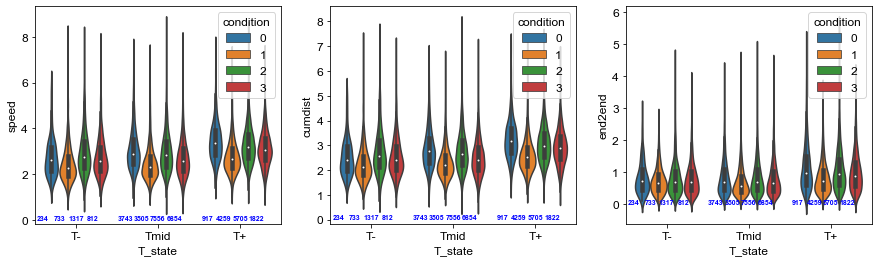

In [14]:
colors = ['tab:red','tab:gray','tab:green']*4
x_order = ['T-','Tmid','T+']
#x_order = ['T-','T+'] do this to remove tpos or tneg

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,4))
#sns.barplot(data=df_tracks_tps, x='tp', y='speed', hue='T_state', errorbar='sd', palette=colors, ax=ax[0], hue_order=hue_order)
#sns.barplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_state', errorbar='sd', palette=colors, ax=ax[1], hue_order=hue_order)
#sns.barplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)


#    sns.barplot(
#       data=flat_df_filt, x='T_state', y='speed', 
#       order = x_order,
#        hue='condition',
#        ci='sd', 
##         palette=colors, 
#        ax=ax[0,i],
##         hue_order=hue_order,
#    )
#    sns.barplot(
#        data=flat_df_filt, x='T_state', y='cumdist', 
#        order = x_order,
#        hue='condition', 
#        ci='sd', 
##         palette=colors, 
#        ax=ax[1,i],
##         hue_order=hue_order,
#    )
#    sns.barplot(
#        data=flat_df_filt, x='T_state', y='end2end', 
#        order = x_order,
#        hue='condition', 
#        ci='sd',
##         palette=colors,
#        ax=ax[2,i],
##         hue_order=hue_order,
#    )

sns.violinplot(
    data=flat_df, x='T_state', y='speed', 
    order = x_order,
    hue='condition',
    ci='sd', 
##         palette=colors, 
    ax=ax[0],
##         hue_order=hue_order,
)
sns.violinplot(
    data=flat_df, x='T_state', y='cumdist', 
    order = x_order,
    hue='condition', 
    ci='sd', 
##         palette=colors, 
    ax=ax[1],
##         hue_order=hue_order,
)
sns.violinplot(
    data=flat_df, x='T_state', y='end2end', 
    order = x_order,
    hue='condition', 
#     inner = 'quartile',
    ci='sd',
##         palette=colors,
    ax=ax[2],
##         hue_order=hue_order,
)

nobs = flat_df.groupby(["condition", "T_state"]).size().reset_index()
nobs = nobs.rename(columns={0: "counts"})

pos = range(len(nobs))
for x in x_order:#tick, label in zip(pos, ax.get_xticklabels()):
    pos = x_order.index(x)
    conditions = nobs[nobs.T_state==x].condition.values
    conditions.sort()
    step=0.2
    i = 0
    for c in conditions:
        for j in range(3):
#         print(c)
            ax[j].text(pos+(i-len(conditions)//2)*step, 0., str(nobs[(nobs.T_state==x)&(nobs.condition==c)].counts.values[0]),
                horizontalalignment='center',
                size=7,
                color='b',
                weight='bold')
        i+=1
# fig.savefig('Tpos_vsTneg.pdf')
fig.savefig('Tpos_vsTneg_polarizationThr7.pdf')
#sns.violinplot(data=df_tracks_tps, x='tp', y='speed', hue='T_state', errorbar='sd', palette=colors, ax=ax[0], hue_order=hue_order)
#sns.violinplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_state', errorbar='sd', palette=colors, ax=ax[1], hue_order=hue_order)
#sns.violinplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)


### Velocity plot at different time points

For each timepoint tp, use cells in the time windfow tp-10, tp+10, and filter out track shorter than 5 tp.

Then, compute which tracks are T positive and make the velocity plot, cumdist plot and end2end plot

In [13]:
# T_thr = [130, 160]
tps = np.linspace(0,200,11)
tps = [30,60,90,120]
time_window = 10
track_length_thr = 5


df_tracks_all_tps = [[None for j in i] for i in datasets]

for i in range( len( df_cells ) ):
    for j in range( len( df_cells[i] ) ):
        # select cells and track of the experiment
        dc = df_cells[i][j]
        
        condition = dc.condition.values[0]
        dataset = dc_lasttp['dataset'].values[0]
        dataset_idx = dc_lasttp['dataset_idx'].values[0]
        thr = T_thr[i][j]      
        
        df_tracks_tps = pd.DataFrame({})

        for tp in tqdm(tps):
            # filter cells around that tp
            df_tp_original = dc[(dc.t>(tp-time_window))&(dc.t<(tp+time_window))]
            track_ids_original = list(set(df_tp_original.cell_id.values))

            # remove short tracks
            df_tp = pd.DataFrame({})
            for track_id in track_ids_original:
                df_cell = df_tp_original[df_tp_original.cell_id==track_id]
                if len(df_cell)>track_length_thr:
                    df_tp = pd.concat([df_tp,df_cell])
            df_tp = df_tp.reset_index(drop=True)

            # find out ids of remaining cells
            track_ids = list(set(df_tp.cell_id.values))

            # compute T positive/negative and mid cells
            T_vals = np.array([np.mean(df_tp[df_tp.cell_id==track_id]['mean-ch1'].values) for track_id in track_ids])
            track_Tpos = []
            for T_val in T_vals:
                if T_val<thr[0]:
                    track_Tpos.append('T-')
                if (T_val>=thr[0])&(T_val<thr[1]):
                    track_Tpos.append('Tmid')
                if T_val>=thr[1]:
                    track_Tpos.append('T+')

            # compute mean velocity
            mean_vel = []
            for track_id in track_ids:
                pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
                mean_vel.append(np.mean(np.linalg.norm(np.diff(pos,axis=0),axis=1)))

            # compute cumdist
            cum_dist = []
            for track_id in track_ids:
                pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
                cum_dist.append(np.sum(np.linalg.norm(np.diff(pos,axis=0),axis=1))/pos.shape[0])

            # compute endo2end
            end2end = []
            for track_id in track_ids:
                pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
                end2end.append(np.linalg.norm(pos[0]-pos[-1])/pos.shape[0])

            df_tracks_tp = pd.DataFrame({
                'condition': condition,
                'dataset': dataset,
                'dataset_idx': dataset_idx,
                'tp': tp,
                'cell_id': track_ids,
                'T_state': track_Tpos,
                'speed': mean_vel,
                'cumdist': cum_dist,
                'end2end': end2end,
            })

            df_tracks_tps = pd.concat([df_tracks_tps, df_tracks_tp])

        df_tracks_all_tps[i][j] = df_tracks_tps

flat_df = funcs.flatten_list( df_tracks_all_tps )
flat_df = pd.concat( flat_df, ignore_index=True )


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.52s/it]


In [14]:
flat_df

,condition,dataset,dataset_idx,tp,cell_id,T_state,speed,cumdist,end2end
0,0,Y:\Kerim_Anlas\gastruloid_imaging\tracking_pre...,3,30,1,Tmid,3.621107,3.103806,1.978853
1,0,Y:\Kerim_Anlas\gastruloid_imaging\tracking_pre...,3,30,2,T+,2.512296,2.302938,0.290122
...,...,...,...,...,...,...,...,...,...
23301,2,Y:\Kerim_Anlas\gastruloid_imaging\tracking_pre...,3,120,2045,Tmid,1.526223,1.445895,0.173829
23302,2,Y:\Kerim_Anlas\gastruloid_imaging\tracking_pre...,3,120,4095,T-,2.985558,2.828423,0.924070


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


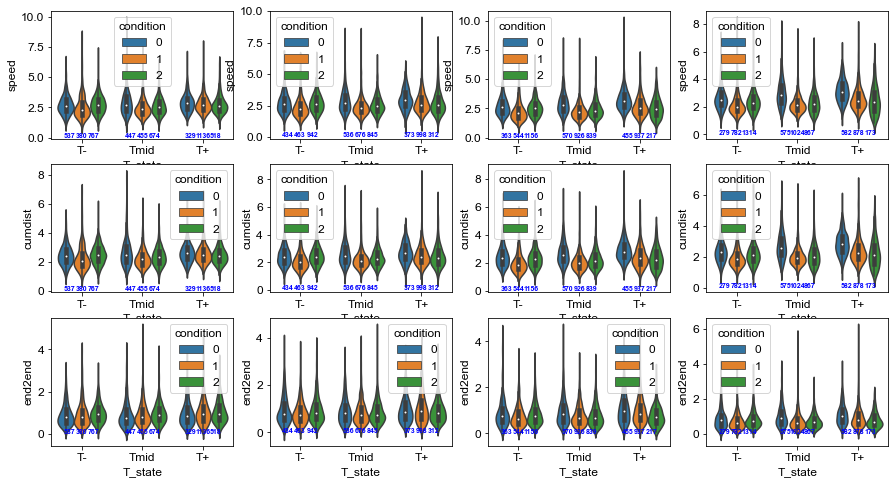

In [15]:
colors = ['tab:red','tab:gray','tab:green']*4
x_order = ['T-','Tmid','T+']
#x_order = ['T-','T+'] do this to remove tpos or tneg

fig, ax = plt.subplots(nrows=3,ncols=len(tps),figsize=(15,8))
#sns.barplot(data=df_tracks_tps, x='tp', y='speed', hue='T_state', errorbar='sd', palette=colors, ax=ax[0], hue_order=hue_order)
#sns.barplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_state', errorbar='sd', palette=colors, ax=ax[1], hue_order=hue_order)
#sns.barplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)

for i in range(len(tps)):
    tp = tps[i]
    flat_df_filt = flat_df.loc[flat_df.tp==tp,:]

#    sns.barplot(
 #       data=flat_df_filt, x='T_state', y='speed', 
 #       order = x_order,
#        hue='condition',
#        ci='sd', 
##         palette=colors, 
#        ax=ax[0,i],
##         hue_order=hue_order,
#    )
#    sns.barplot(
#        data=flat_df_filt, x='T_state', y='cumdist', 
#        order = x_order,
#        hue='condition', 
#        ci='sd', 
##         palette=colors, 
#        ax=ax[1,i],
##         hue_order=hue_order,
#    )
#    sns.barplot(
#        data=flat_df_filt, x='T_state', y='end2end', 
#        order = x_order,
#        hue='condition', 
#        ci='sd',
##         palette=colors,
#        ax=ax[2,i],
##         hue_order=hue_order,
#    )

    sns.violinplot(
        data=flat_df_filt, x='T_state', y='speed', 
        order = x_order,
        hue='condition',
        ci='sd', 
##         palette=colors, 
        ax=ax[0,i],
##         hue_order=hue_order,
    )
    sns.violinplot(
        data=flat_df_filt, x='T_state', y='cumdist', 
        order = x_order,
        hue='condition', 
        ci='sd', 
##         palette=colors, 
        ax=ax[1,i],
##         hue_order=hue_order,
    )
    sns.violinplot(
        data=flat_df_filt, x='T_state', y='end2end', 
        order = x_order,
        hue='condition', 
        ci='sd',
##         palette=colors,
        ax=ax[2,i],
##         hue_order=hue_order,
    )
    
    nobs = flat_df_filt.groupby(["condition", "T_state"]).size().reset_index()
    nobs = nobs.rename(columns={0: "counts"})

    pos = range(len(nobs))
    for x in x_order:#tick, label in zip(pos, ax.get_xticklabels()):
        pos = x_order.index(x)
        conditions = nobs[nobs.T_state==x].condition.values
        conditions.sort()
        step=0.2
        k = 0
        for c in conditions:
            for j in range(3):
    #         print(c)
                ax[j,i].text(pos+(k-len(conditions)//2)*step, 0., str(nobs[(nobs.T_state==x)&(nobs.condition==c)].counts.values[0]),
                    horizontalalignment='center',
                    size=7,
                    color='b',
                    weight='bold')
            k+=1


fig.savefig('Tpos_vsTneg_aroundTPS.pdf')

#sns.violinplot(data=df_tracks_tps, x='tp', y='speed', hue='T_state', errorbar='sd', palette=colors, ax=ax[0], hue_order=hue_order)
#sns.violinplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_state', errorbar='sd', palette=colors, ax=ax[1], hue_order=hue_order)
#sns.violinplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)
